In [205]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [206]:
data = pd.read_csv('./relevant_data/wrangled_data.csv')

In [207]:
data.head()

,state,county,density_km,days_counted,case_count_28_days,death_count_28_days,confirmed_infection(%_of_pop),death_perc(%_of_case),avg_daily_case_increase(%_of_pop),case_count_28_days(%_of_pop),...,percent_65_and_over,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural
0,Alabama,Autauga,35.436,40,28,1,0.087959,6.250000,0.002199,0.051309,...,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
1,Alabama,Baldwin,44.261,50,59,1,0.102598,2.139037,0.002052,0.032370,...,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
2,Alabama,Barbour,11.979,30,39,1,0.163893,2.222222,0.005463,0.142040,...,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635
3,Alabama,Bibb,14.215,34,38,0,0.187650,0.000000,0.005519,0.165830,...,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286,0.268210,46.781250,68.352607
4,Alabama,Blount,34.325,39,26,0,0.069781,0.000000,0.001789,0.045358,...,18.236515,1.462656,0.653527,0.319848,0.121024,9.571231,86.886238,1.724520,50.726141,89.951502


In [208]:
data.columns

Index(['state', 'county', 'density_km', 'days_counted', 'case_count_28_days',
       'death_count_28_days', 'confirmed_infection(%_of_pop)',
       'death_perc(%_of_case)', 'avg_daily_case_increase(%_of_pop)',
       'case_count_28_days(%_of_pop)', 'death_count_28_days(%_of_case)',
       'years_of_potential_life_lost_rate', 'percent_fair_or_poor_health',
       'percent_low_birthweight', 'percent_smokers',
       'percent_adults_with_obesity', 'food_environment_index',
       'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured', 'primary_care_physicians_rate',
       'dentist_rate', 'mental_health_provider_rate',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'pe

In [209]:
excluded_columns = [
    'state', 
    'county',  
    'days_counted', 
    'case_count_28_days',
    'death_count_28_days', 
    'confirmed_infection(%_of_pop)',
    'death_perc(%_of_case)', 
    'avg_daily_case_increase(%_of_pop)',
    'case_count_28_days(%_of_pop)', 
    'death_count_28_days(%_of_case)',
    'presence_of_water_violation'
]

In [210]:
data_subset = data[excluded_columns]

In [211]:
main_data = data.drop(excluded_columns, axis=1)

In [212]:
main_data.columns

Index(['density_km', 'years_of_potential_life_lost_rate',
       'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured', 'primary_care_physicians_rate',
       'dentist_rate', 'mental_health_provider_rate',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'percent_unemployed',
       'percent_children_in_poverty', '80th_percentile_income',
       '20th_percentile_income', 'percent_single_parent_households',
       'social_association_rate', 'annual_average_violent_crimes',
       'violent_crime_rate', 'injury_death_rate', 

In [213]:
chi_square_value, p_value = calculate_bartlett_sphericity(main_data)

In [214]:
chi_square_value, p_value

(183931.078729674, 0.0)

In [215]:
kmo_all, kmo_model = calculate_kmo(main_data)

In [216]:
kmo_model

0.8738059205225308

In [217]:
main_data.shape

(1907, 68)

In [218]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='varimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [219]:
ev, v = fa.get_eigenvalues()

In [220]:
ev[:25]

array([19.29549584,  8.95252747,  5.29392275,  3.83703273,  2.61872266,
        2.05002621,  1.86267681,  1.75907395,  1.41687209,  1.28661107,
        1.2500238 ,  1.09903533,  1.03514152,  1.00432119,  0.93158609,
        0.83439614,  0.79901898,  0.73031749,  0.71278843,  0.65193914,
        0.63815322,  0.57199822,  0.55146206,  0.50888969,  0.49473859])

In [221]:
ev[25:]

array([4.80938299e-01, 4.68392691e-01, 4.56093063e-01, 4.25893876e-01,
       3.89399378e-01, 3.75504300e-01, 3.45662643e-01, 3.38479067e-01,
       3.19500806e-01, 3.16634120e-01, 3.04060173e-01, 2.90684659e-01,
       2.88103745e-01, 2.64903060e-01, 2.46072385e-01, 2.29802695e-01,
       2.13988738e-01, 1.93014886e-01, 1.82133254e-01, 1.77445988e-01,
       1.68861616e-01, 1.57453970e-01, 1.45402804e-01, 1.39722868e-01,
       1.32620413e-01, 1.11145192e-01, 9.77984295e-02, 8.70723322e-02,
       7.68205301e-02, 7.47394473e-02, 5.25016758e-02, 5.02671843e-02,
       4.57471605e-02, 4.03078171e-02, 3.63716241e-02, 2.85578539e-02,
       2.05849184e-02, 1.99695195e-02, 1.53055652e-02, 3.69984214e-03,
       7.27318437e-04, 4.85699618e-04, 3.56920758e-04])

In [222]:
fa.loadings_.shape

(68, 25)

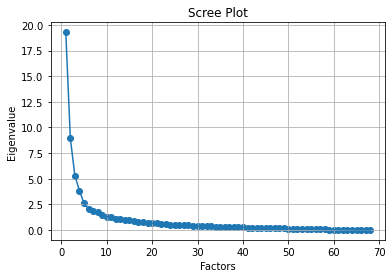

In [223]:
# Create scree plot using matplotlib
plt.scatter(range(1, main_data.shape[1]+1), ev)
plt.plot(range(1, main_data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [224]:
fa = FactorAnalyzer()
fa.set_params(n_factors=11, rotation='varimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=11, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [225]:
fa.get_factor_variance()

(array([17.18615391,  4.11233314,  3.82331759,  3.7040072 ,  3.36705475,
         3.27422263,  3.11978104,  2.31630167,  2.01357289,  1.82303599,
         1.51979621]),
 array([0.25273756, 0.06047549, 0.05622526, 0.05447069, 0.04951551,
        0.04815033, 0.04587913, 0.03406326, 0.02961137, 0.02680935,
        0.02234994]),
 array([0.25273756, 0.31321304, 0.3694383 , 0.423909  , 0.47342451,
        0.52157484, 0.56745397, 0.60151723, 0.6311286 , 0.65793795,
        0.6802879 ]))

In [226]:
factor_df = pd.DataFrame(fa.loadings_)

In [227]:
factor_df.index = main_data.columns

In [228]:
factor_df.shape

(68, 11)

In [229]:
pd.set_option('display.max_rows', None)
factor_df

,0,1,2,3,4,5,6,7,8,9,10
density_km,-0.145835,0.068708,0.201226,0.127154,0.055128,0.518760,-0.022206,0.065136,0.195158,-0.015738,0.111187
years_of_potential_life_lost_rate,0.894989,-0.128012,-0.112592,0.005087,0.146925,-0.033333,0.094118,-0.106757,0.116097,0.137447,-0.015413
percent_fair_or_poor_health,0.859818,0.286777,0.116336,-0.078040,0.150931,-0.054935,0.126797,0.138906,0.001384,0.003620,0.044437
percent_low_birthweight,0.622690,-0.079257,0.100025,0.000541,0.516176,0.029006,0.049201,-0.021273,0.138986,-0.187411,0.072571
percent_smokers,0.823340,-0.209088,-0.049041,-0.045991,-0.004172,-0.083152,-0.108520,0.165946,-0.076425,0.081944,0.058231
percent_adults_with_obesity,0.562713,-0.048124,-0.245250,-0.247377,0.123864,-0.146233,-0.084150,0.126850,-0.167157,-0.007647,0.179141
food_environment_index,-0.673180,0.037504,-0.218088,-0.108365,-0.419832,0.086979,-0.125239,-0.160402,0.101976,-0.228080,0.137574
percent_physically_inactive,0.712614,-0.069352,-0.176188,-0.248385,0.017230,-0.082005,0.124229,0.015025,-0.055200,-0.081469,0.141360
percent_with_access_to_exercise_opportunities,-0.494322,0.105357,0.132484,0.447769,-0.005703,0.209823,-0.161712,0.026415,0.016312,-0.073443,0.057347
percent_excessive_drinking,-0.641642,-0.066713,-0.023996,0.040037,-0.112592,0.094396,-0.254870,0.151439,-0.176568,0.049095,-0.069402


Notes:

0. Poor well-being both physically and mentally
1. Shelter issue severity 
2. Lack of insurance
3. Availability to health/wellness facilities
4. Crime/Labour force
5. How young the population is
6. Overpopulation
7. Not sure - percent_female, percent_drive_alone_to_work, average_daily_pm2_5
8. Poor food index
9. Income
10. Children related

In [230]:
main_data_transformed = pd.DataFrame(fa.transform(main_data))

In [231]:
data = pd.concat([data_subset, main_data_transformed], axis=1)

In [232]:
data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.029933
case_count_28_days                   0.395963
death_count_28_days                  0.326605
confirmed_infection(%_of_pop)        0.761890
death_perc(%_of_case)                0.061411
avg_daily_case_increase(%_of_pop)    0.810547
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.016872
0                                    0.050587
1                                    0.013238
2                                    0.101210
3                                   -0.055450
4                                    0.106027
5                                    0.004508
6                                   -0.010251
7                                    0.027644
8                                    0.082432
9                                   -0.070890
10                                   0.070613
Name: case_count_28_days(%_of_pop), dtype: float64

In [285]:
state_data = data[data['state'] == 'Nebraska']

In [286]:
state_data.shape

(28, 22)

In [287]:
state_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                        -0.122522
case_count_28_days                   0.887332
death_count_28_days                  0.909875
confirmed_infection(%_of_pop)        0.700244
death_perc(%_of_case)                0.356436
avg_daily_case_increase(%_of_pop)    0.736831
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.049238
0                                    0.199485
1                                    0.305040
2                                   -0.035870
3                                    0.216958
4                                    0.091781
5                                   -0.231001
6                                    0.043641
7                                    0.134044
8                                   -0.215907
9                                   -0.253236
10                                  -0.116079
Name: case_count_28_days(%_of_pop), dtype: float64